# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [260]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study=pd.merge(mouse_metadata,study_results,on='Mouse ID')
# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [261]:
# Checking the number of mice.
number_of_mice=mouse_metadata.count()['Mouse ID']
number_of_mice

249

In [262]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'],keep=False)]['Mouse ID'].unique()



array(['g989'], dtype=object)

In [264]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'],keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [266]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_index = mouse_study[ mouse_study['Mouse ID']=='g989' ].index
mouse_study_clean=mouse_study.drop(drop_index )
mouse_study_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [267]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_clean['Mouse ID'].unique())

248

## Summary Statistics

In [268]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

Mean_Tumor_Volume=mouse_study_clean.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
Var_Tumor_Volume=mouse_study_clean.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
Std_Tumor_Volume=mouse_study_clean.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
Median_Tumor_Volume=mouse_study_clean.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
SEM_Tumor_Volume=mouse_study_clean.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.
Drug_Regimen_Summary=pd.DataFrame({'Mean Tumor Volume':Mean_Tumor_Volume,
                 'Median Tumor Volume':Median_Tumor_Volume,
                 'Tumor Volume Variance':Var_Tumor_Volume,
                 'Tumor Volume Std. Dev.':Std_Tumor_Volume,
                 'Tumor Volume Std. Err.':SEM_Tumor_Volume,
                })
Drug_Regimen_Summary.head(10)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [271]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

Drug_Regimen_Summary=mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 
                                                                                          'median', 'var', 
                                                                                          'std', 'sem'])
Drug_Regimen_Summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot: xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

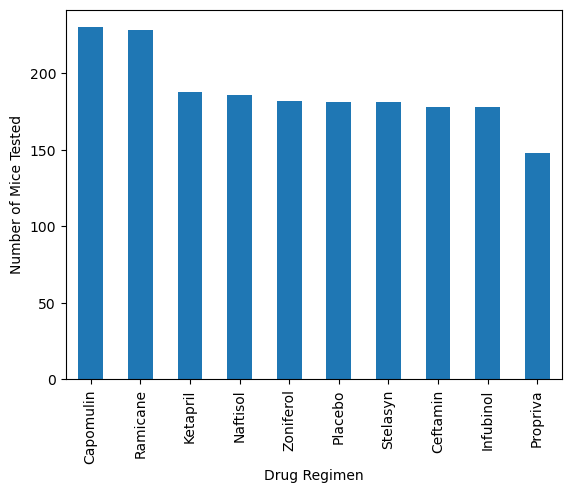

In [272]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Drug_Regimen_df is mouse_study_clean that is groupby('Drug Regimen')
Drug_Regimen_df.describe()['Timepoint'].sort_values(by='count',ascending=False)['count'].plot(kind='bar',
                                                                                              sort_columns=True,
                                                                                              ylabel='Number of Mice Tested')



<AxesSubplot: ylabel='Sex'>

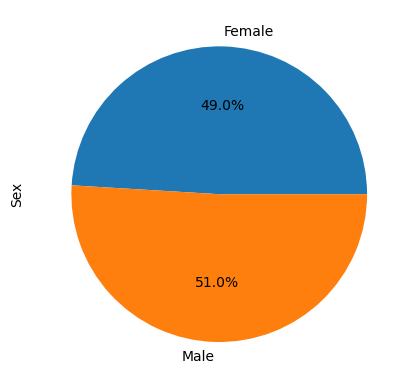

In [273]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_study_clean.groupby('Sex').count()['Mouse ID'].plot(kind='pie',ylabel='Sex',autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [275]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#first we select the four types of treatment
df_Capomulin = mouse_study_clean[mouse_study_clean['Drug Regimen'] == 'Capomulin']
df_Ramicane = mouse_study_clean[mouse_study_clean['Drug Regimen'] == 'Ramicane']
df_Infubinol = mouse_study_clean[mouse_study_clean['Drug Regimen'] == 'Infubinol']
df_Ceftamin = mouse_study_clean[mouse_study_clean['Drug Regimen'] == 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
df_Capomulin_max=pd.DataFrame(df_Capomulin.groupby('Mouse ID').max()['Timepoint'])
df_Ramicane_max=pd.DataFrame(df_Ramicane.groupby('Mouse ID').max()['Timepoint'])
df_Infubinol_max=pd.DataFrame(df_Infubinol.groupby('Mouse ID').max()['Timepoint'])
df_Ceftamin_max=pd.DataFrame(df_Ceftamin.groupby('Mouse ID').max()['Timepoint'])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_Capomulin_max_merge=pd.merge(df_Capomulin_max,mouse_study_clean,on=['Mouse ID','Timepoint'],how='left')
df_Ramicane_max_merge=pd.merge(df_Ramicane_max,mouse_study_clean,on=['Mouse ID','Timepoint'],how='left')
df_Infubinol_max_merge=pd.merge(df_Infubinol_max,mouse_study_clean,on=['Mouse ID','Timepoint'],how='left')
df_Ceftamin_max_merge=pd.merge(df_Ceftamin_max,mouse_study_clean,on=['Mouse ID','Timepoint'],how='left')

In [276]:
# Put treatments into a list 
treatments_label=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatments_df=[df_Capomulin_max_merge, df_Ramicane_max_merge, df_Infubinol_max_merge, df_Ceftamin_max_merge]


# Create empty list to fill with quartiles and outliers of each treatment
treatments_outliers=[]
quatriles_list=[]
treatment_num=0

# Loop through treatments_df and Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments_df:
    # find quartile 
    quartile=treatment['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lower_q=quartile[.25]
    upper_q=quartile[.75]

    #find the Inter quartile range
    IQR=upper_q-lower_q

    #calculate lower/upper bounds
    lower_bound=lower_q-1.5*IQR
    upper_bound=upper_q+1.5*IQR

    #fill out the quartiles_list
    quatriles_list.append({f'{treatments_label[treatment_num]}_lower_q':lower_q,
                          f'{treatments_label[treatment_num]}_upper_q':upper_q,
                          f'{treatments_label[treatment_num]}_IQR':IQR,
                          f'{treatments_label[treatment_num]}_lower_bound':lower_bound,
                          f'{treatments_label[treatment_num]}_upper_bound':upper_bound})
    
    #fill out the outlier list
    outliers=treatment[(treatment['Timepoint']<lower_bound)| (treatment['Timepoint']>upper_bound)]
    treatments_outliers.append(outliers)
    treatment_num+=1

#print out the results
for i in range(len(treatments_label)):
    print (quatriles_list[i],'/n')
    print('-'*100)
         

{'Capomulin_lower_q': 32.37735684, 'Capomulin_upper_q': 40.1592203, 'Capomulin_IQR': 7.781863460000004, 'Capomulin_lower_bound': 20.70456164999999, 'Capomulin_upper_bound': 51.83201549} /n
----------------------------------------------------------------------------------------------------
{'Ramicane_lower_q': 31.56046955, 'Ramicane_upper_q': 40.65900627, 'Ramicane_IQR': 9.098536719999998, 'Ramicane_lower_bound': 17.912664470000003, 'Ramicane_upper_bound': 54.30681135} /n
----------------------------------------------------------------------------------------------------
{'Infubinol_lower_q': 54.04860769, 'Infubinol_upper_q': 65.52574285, 'Infubinol_IQR': 11.477135160000003, 'Infubinol_lower_bound': 36.83290494999999, 'Infubinol_upper_bound': 82.74144559000001} /n
----------------------------------------------------------------------------------------------------
{'Ceftamin_lower_q': 48.72207785, 'Ceftamin_upper_q': 64.29983003, 'Ceftamin_IQR': 15.577752179999997, 'Ceftamin_lower_bound'

Text(0, 0.5, 'Final Tumor Volume (mm3)')

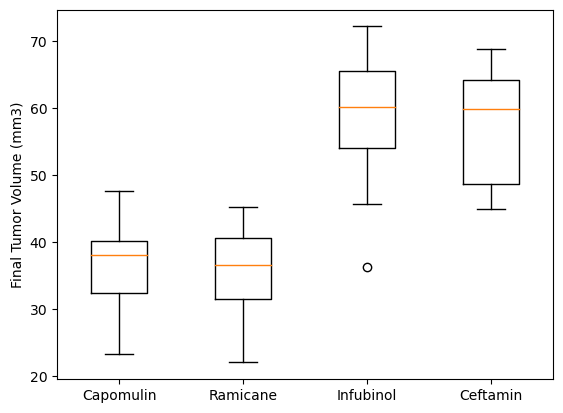

In [227]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments_vol_df=[df_Capomulin_max_merge['Tumor Volume (mm3)'],
                   df_Ramicane_max_merge['Tumor Volume (mm3)'], 
                   df_Infubinol_max_merge['Tumor Volume (mm3)'],
                   df_Ceftamin_max_merge['Tumor Volume (mm3)']]


plt.boxplot(treatments_vol_df, labels=treatments_label)
plt.ylabel('Final Tumor Volume (mm3)')


Text(0, 0.5, 'Tumor Volume (mm3)')

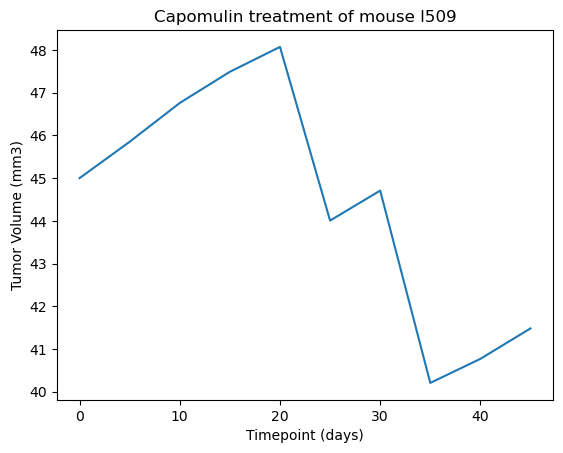

In [244]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_mouse_l509=df_Capomulin[df_Capomulin['Mouse ID']=='l509']
x_value=Capomulin_mouse_l509['Timepoint']
y_value=Capomulin_mouse_l509['Tumor Volume (mm3)']
plt.plot(x_value,y_value)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

## Line and Scatter Plots

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

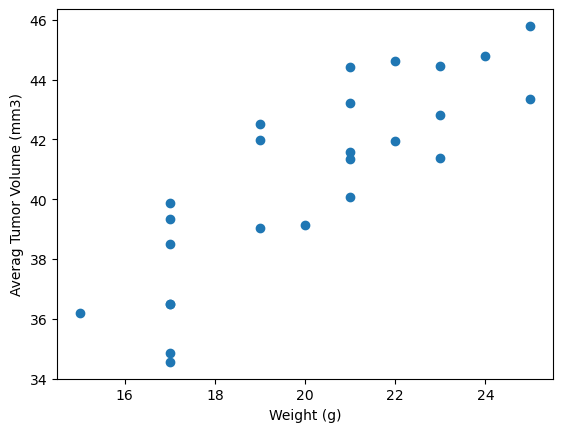

In [246]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#find the avg dataframe
Capomulin_avg_vol_df =df_Capomulin.groupby(['Mouse ID']).mean()

#scatterplot for average tumor volume vs. mouse weight
plt.scatter(Capomulin_avg_vol_df['Weight (g)'],Capomulin_avg_vol_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')


## Correlation and Regression

In [252]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen

#using pearsonr to find the correlation
corr_MouseWeight_tumorVol = st.pearsonr(Capomulin_avg_vol_df['Weight (g)'],Capomulin_avg_vol_df['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {round(corr_MouseWeight_tumorVol[0],2)}')

The correlation between mouse weight and the average tumor volume is 0.84


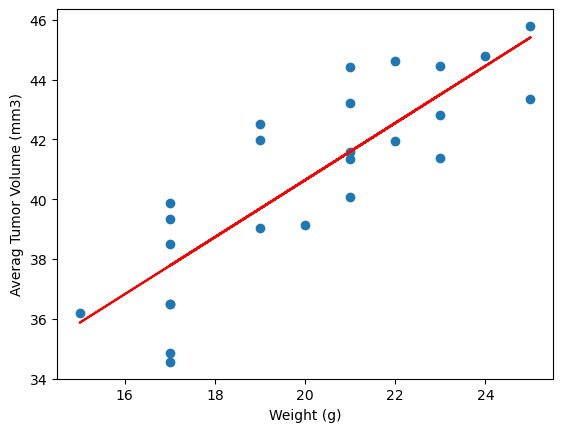

In [257]:
#Calculate the correlation coefficient and linear regression model

(slope, intercept,rvalue, pvalue, stderr)= linregress(Capomulin_avg_vol_df['Weight (g)'],
                                                      Capomulin_avg_vol_df['Tumor Volume (mm3)'])
regress_values=Capomulin_avg_vol_df['Weight (g)']* slope + intercept

plt.scatter(Capomulin_avg_vol_df['Weight (g)'],Capomulin_avg_vol_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.plot(Capomulin_avg_vol_df['Weight (g)'], regress_values, color='red')
